### ***Importamos de las Librerias utilizadas para el presente desafío 💪***

In [ ]:
from matplotlib import colors
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Conectamos con Google Drive 🌎


*   Base de Datos Seleccionada - Airbnb



In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Curso Data Science/Bases de Datos/'


/content/drive/MyDrive/Curso Data Science/Bases de Datos


In [ ]:
df_air = pd.read_csv('Airbnb_Open_Data.csv' )



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Visualizamos la Base de Datos - Primeros 5 Registros 😎


*   Todos los títulos en minuscula
*   Reemplazamos espacios por _ en los títulos
*   Shape - Base con 26 columnas y 102.599 filas




In [ ]:
df_air.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df_air.columns = [col.lower().replace(" ","_") for col in df_air.columns]

In [ ]:
df_air.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df_air.shape

(102599, 26)

## Analisis Base de Datos 🔎


*   Lista con Nombre de Columnas
*   Suma de Valores Vacios por cada Columna
*   Detalle de cantidad de Valores Vacios por Columna
*   Porcentaje de Valores Vacios de Cada Columna

In [ ]:
print(df_air.columns.to_list())

['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


In [ ]:
missing_val_summary = df_air.isnull().sum()

In [ ]:
missing_val_summary = missing_val_summary[missing_val_summary > 0].sort_values(ascending=False)

In [ ]:
print(missing_val_summary)

license                           102597
house_rules                        52131
last_review                        15893
reviews_per_month                  15879
country                              532
availability_365                     448
minimum_nights                       409
host_name                            406
review_rate_number                   326
calculated_host_listings_count       319
host_identity_verified               289
service_fee                          273
name                                 250
price                                247
construction_year                    214
number_of_reviews                    183
country_code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood_group                   29
neighbourhood                         16
long                                   8
lat                                    8
dtype: int64


In [ ]:
missing_val_summary*100/len(df_air)

license                           99.998051
house_rules                       50.810437
last_review                       15.490404
reviews_per_month                 15.476759
country                            0.518524
availability_365                   0.436651
minimum_nights                     0.398639
host_name                          0.395715
review_rate_number                 0.317742
calculated_host_listings_count     0.310919
host_identity_verified             0.281679
service_fee                        0.266084
name                               0.243667
price                              0.240743
construction_year                  0.208579
number_of_reviews                  0.178364
country_code                       0.127682
instant_bookable                   0.102340
cancellation_policy                0.074075
neighbourhood_group                0.028265
neighbourhood                      0.015595
long                               0.007797
lat                             

# Analisis y Limpieza Base de Datos ✂


*   Metodo Drop - Nuevo DataFrame eliminando las columnas Host ID, License y Host Name (> 50% de datos vacios). Axis (Valor 1 - Elimina Columnas) / Inplace (Valor True - La eliminación se realiza en el mismo DF)
*   Metodo Nunique - Cuenta los Valroes Unicos
*   Metodo Sort_Value - Ordenamos los valores en forma ascendente
*   Metodo Unique  - Devuelve los elementos únicos de una columna
*   Metodo Value_Counts  - Cuenta valores de cada elemento de la columna


In [ ]:
df_air.drop(['host_id','license', 'host_name'], axis=1, inplace=True)

In [ ]:
df_air.nunique().sort_values(ascending=False)

id                                102058
name                               61281
lat                                21991
long                               17774
last_review                         2477
house_rules                         1976
price                               1151
reviews_per_month                   1016
number_of_reviews                    476
availability_365                     438
service_fee                          231
neighbourhood                        224
minimum_nights                       153
calculated_host_listings_count        78
construction_year                     20
neighbourhood_group                    7
review_rate_number                     5
room_type                              4
cancellation_policy                    3
host_identity_verified                 2
instant_bookable                       2
country                                1
country_code                           1
dtype: int64

In [ ]:
df_air['country'].nunique()

1

In [ ]:
df_air['country'].unique()

array(['United States', nan], dtype=object)

In [ ]:
df_air['country'].value_counts()/len(df_air)

United States    0.994815
Name: country, dtype: float64

In [ ]:
df_air['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
df_air[df_air.country.isnull()]['neighbourhood_group'].value_counts()

Manhattan        223
Brooklyn         220
Queens            62
Bronx             18
Staten Island      8
Name: neighbourhood_group, dtype: int64

In [ ]:
df_air['country'] = 'United States'

In [ ]:
feature = 'host_identity_verified'

In [ ]:
df_air['host_identity_verified'].nunique()

2

In [ ]:
df_air['host_identity_verified'].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [ ]:
df_air['host_identity_verified'].value_counts()*100/len(df_air)

unconfirmed    49.90302
verified       49.81530
Name: host_identity_verified, dtype: float64

In [ ]:
df_air['host_identity_verified'] = np.where(df_air['host_identity_verified'].isnull(), 'Unknown', df_air['host_identity_verified'])

In [ ]:
df_air['host_identity_verified'].value_counts()

unconfirmed    51200
verified       51110
Unknown          289
Name: host_identity_verified, dtype: int64

# Mathplotlib - 1er. Grafico 📈
♣ Grafico de Barras con cantidad de Identidades Verificadas.

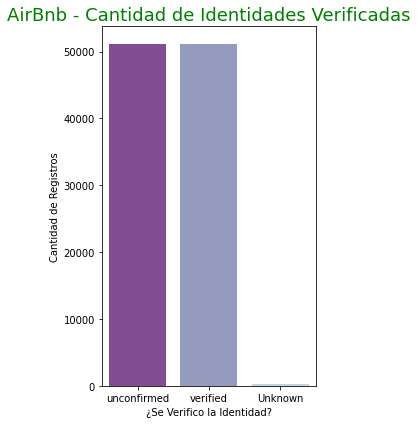

In [ ]:
from matplotlib.transforms import Bbox
plt.figure(figsize=(5,6))
sns.countplot(data=df_air, x='host_identity_verified', palette='BuPu_r')
plt.title('AirBnb - Cantidad de Identidades Verificadas', loc='center', fontsize=18, color='g')
plt.ylabel('Cantidad de Registros')
plt.xlabel('¿Se Verifico la Identidad?')
plt.show()

# Mathplotlib - 2do. Grafico 📈
♣ Grafico de Tortas con porcentaje de Identidades Verificadas.

In [ ]:
nombres = df_air['host_identity_verified'].unique()
nombres = ['Sin Verificar','Verificado','Sin Datos']
print(nombres)

['Sin Verificar', 'Verificado', 'Sin Datos']


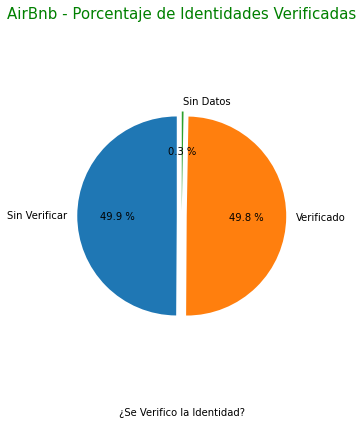

In [ ]:
plt.figure(figsize=(5,6))
desfase = (0.05, 0.05, 0.05)
plt.xlabel('¿Se Verifico la Identidad?')
plt.pie(df_air['host_identity_verified'].value_counts()*100/len(df_air), autopct='%.1f %%', startangle=90, explode=desfase, labels=nombres)
plt.title('AirBnb - Porcentaje de Identidades Verificadas', loc='center', fontsize=15, color='g')
plt.axis("equal")
plt.show()

# Mathplotlib - 3er. Grafico 📈
♣ Grafico de Torta con distribución porcentual de los alquileres por barrio

In [ ]:
df_air['neighbourhood_group'].nunique()

7

In [ ]:
print(df_air['neighbourhood_group'].unique())

['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']


In [ ]:
df_air['neighbourhood_group'].isnull().sum()

29

In [ ]:
df_air['neighbourhood_group'] = np.where(df_air['neighbourhood_group'].isnull(), 'Unknown', df_air['neighbourhood_group'])

In [ ]:
df_air['neighbourhood_group'] = df_air['neighbourhood_group'].str.title()

In [ ]:
df_air['neighbourhood_group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
Unknown             29
Brookln              1
Manhatan             1
Name: neighbourhood_group, dtype: int64

In [ ]:
df_air['neighbourhood_group'] = df_air['neighbourhood_group'].replace("Manhatan","Manhattan")
df_air['neighbourhood_group'] = df_air['neighbourhood_group'].replace("Brookln","Brooklyn")

In [ ]:
df_air['neighbourhood_group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Unknown             29
Name: neighbourhood_group, dtype: int64

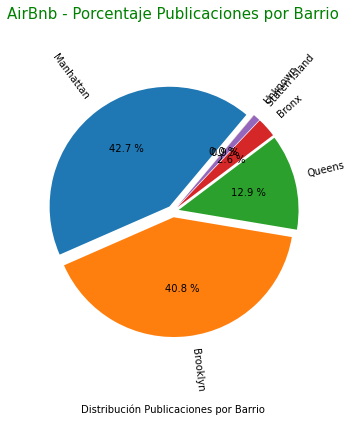

In [ ]:
plt.figure(figsize=(5,6))
plt.xlabel('Distribución Publicaciones por Barrio')
desfase = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(df_air['neighbourhood_group'].value_counts()*100/len(df_air),autopct='%.1f %%', startangle=50, explode=desfase, labels=df_air['neighbourhood_group'].value_counts().index, rotatelabels=1)
plt.title('AirBnb - Porcentaje Publicaciones por Barrio', loc='center', fontsize=15, color='g')
plt.axis("equal")
plt.show()

# Mathplotlib - 4to. Grafico  📈
♠ Se elaboran rangos de meses

♠ Se contabiliza la disponiblidad según los rangos elaborados

♠ Se calculan los porcentajes de participación de cada rango

♠ Grafico de Torta

In [ ]:
df_air['availability_grp'] = np.where(df_air['availability_365']<=90, '0-3 Months',
                   np.where((df_air['availability_365'] > 9) & (df_air['availability_365'] <= 180), '3-6 Months',
                   np.where((df_air['availability_365'] > 180) & (df_air['availability_365'] <= 270), '6-9 Months', '9-12 Months')))

In [ ]:
df_air['availability_grp'].value_counts()

0-3 Months     50103
9-12 Months    25594
3-6 Months     14974
6-9 Months     11928
Name: availability_grp, dtype: int64

In [ ]:
availability_grp_pct = df_air['availability_grp'].value_counts()*100/len(df_air)
print(availability_grp_pct)

0-3 Months     48.833809
9-12 Months    24.945662
3-6 Months     14.594684
6-9 Months     11.625844
Name: availability_grp, dtype: float64


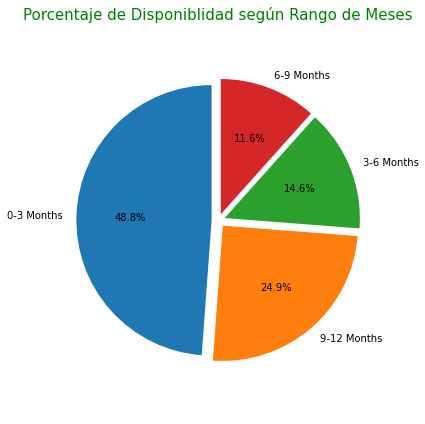

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(availability_grp_pct, labels = availability_grp_pct.index,
        autopct='%1.1f%%', startangle=90, explode=[0.05,0.05,0.05,0.05])
plt.title('Porcentaje de Disponiblidad según Rango de Meses', loc='center', fontsize=15, color='g')
plt.axis("equal")
plt.show()

# Seaborn - 1er. Grafico 📈
♣ Primero Analisis columna vecindario

♣ Luego Limpieza de datos, con valores vacios y nombres duplicados, los cuales se unifican

♣ Cantidad de Registros por Barrio

♣ Grafico de Barras Horizontal para identificar concentración de hospedajes

In [ ]:
df_air['neighbourhood_group'].nunique()


6

In [ ]:
print(df_air['neighbourhood_group'].unique())

['Brooklyn' 'Manhattan' 'Queens' 'Unknown' 'Staten Island' 'Bronx']


In [ ]:
df_air['neighbourhood_group'].isnull().sum()


0

In [ ]:
df_air['neighbourhood_group'] = np.where(df_air['neighbourhood_group'].isnull(), 'Unknown', df_air['neighbourhood_group'])

In [ ]:
df_air['neighbourhood_group'] = df_air['neighbourhood_group'].str.title()

In [ ]:
df_air['neighbourhood_group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Unknown             29
Name: neighbourhood_group, dtype: int64

In [ ]:
df_air['neighbourhood_group'] = df_air['neighbourhood_group'].replace("Manhatan","Manhattan")
df_air['neighbourhood_group'] = df_air['neighbourhood_group'].replace("Brookln","Brooklyn")


In [ ]:
df_air['neighbourhood_group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Unknown             29
Name: neighbourhood_group, dtype: int64

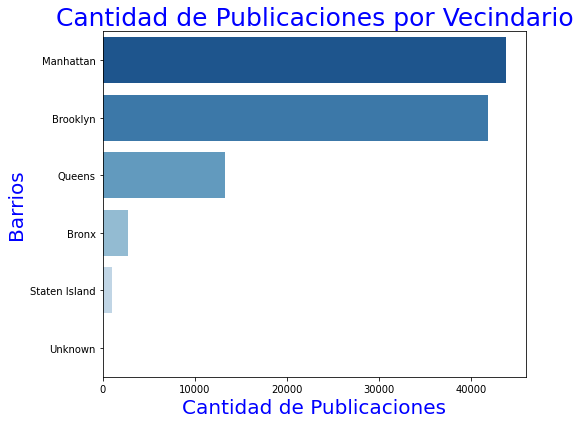

In [ ]:
plt.figure(figsize=(8,6))
sns.color_palette()
sns.barplot(x=df_air['neighbourhood_group'].value_counts(), 
            y=df_air['neighbourhood_group'].value_counts().index, palette="Blues_r")
plt.title('Cantidad de Publicaciones por Vecindario', loc='center', fontsize=25, color='b')
plt.ylabel('Barrios', fontsize=20, color='b')
plt.xlabel('Cantidad de Publicaciones', fontsize=20, color='b')
plt.show()


# Seaborn - 2do. Grafico 📈

♦ Grafico de Barras con la cantidad de publicaciones según días disponibles

In [ ]:
df_air['availability_365'] = np.where(df_air['availability_365']<0, df_air['availability_365']*-1, df_air['availability_365'])

In [ ]:
df_air['availability_365'] = np.where(df_air['availability_365']>365, 365, df_air['availability_365'])


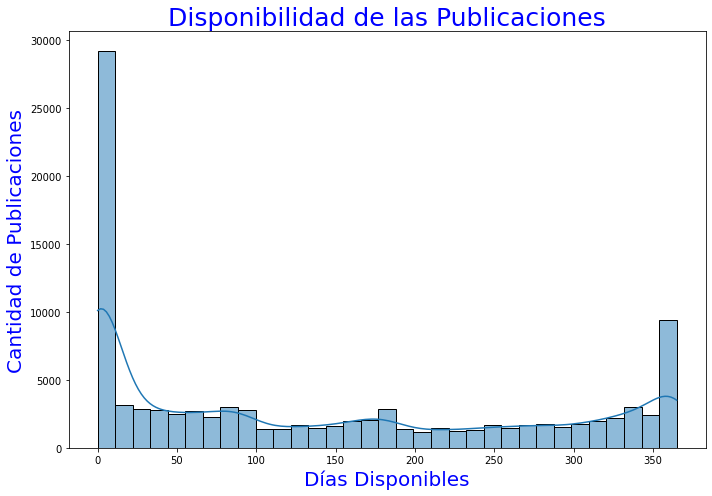

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=df_air, x='availability_365', kde=True)
plt.title('Disponibilidad de las Publicaciones', loc='center', fontsize=25, color='b')
plt.ylabel('Cantidad de Publicaciones', fontsize=20, color='b')
plt.xlabel('Días Disponibles', fontsize=20, color='b')
plt.show()


# Seaborn - 3er. Grafico 📈
♦ Grafico de Barras con las Valoraciones de los Clientes

In [ ]:
df_air['review_rate_number'].nunique()

5

In [ ]:
df_air['review_rate_number'].unique()

array([ 4.,  5.,  3., nan,  2.,  1.])

In [ ]:
df_air['review_rate_number'].isnull().sum()

326

In [ ]:
df_air['review_rate_number'].isnull().sum()*100/len(df_air)

0.3177418883224983

In [ ]:
df_air['review_rate_number'].value_counts()

5.0    23369
4.0    23329
3.0    23265
2.0    23098
1.0     9212
Name: review_rate_number, dtype: int64

In [ ]:
df_air['review_rate_number'] = df_air['review_rate_number'].astype('Int64',errors='ignore')
df_air['review_rate_number'] = np.where(df_air['review_rate_number'].isnull(), -1, df_air['review_rate_number'])

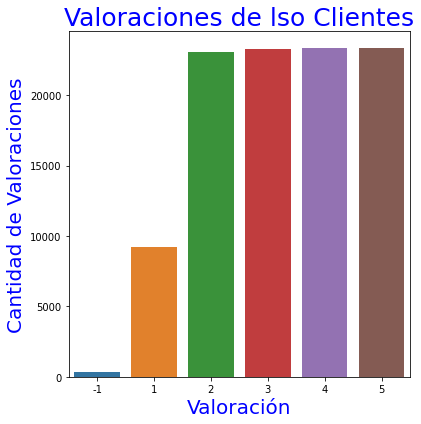

In [ ]:

plt.figure(figsize=(6,6))
sns.countplot(data=df_air, x='review_rate_number')
plt.title('Valoraciones de lso Clientes', loc='center', fontsize=25, color='b')
plt.ylabel('Cantidad de Valoraciones', fontsize=20, color='b')
plt.xlabel('Valoración', fontsize=20, color='b')
plt.show()

# Plus - Seaborn
• Grafico de Barras con promedio de valoraciones por Vecindario

• Se filtra los mejores 25 barrios con mejor valoración

In [ ]:
avg_rating_per_neighbourhood = df_air.groupby(['neighbourhood'])['review_rate_number'].mean().sort_values(ascending=False)[0:24]
print(avg_rating_per_neighbourhood)

neighbourhood
Glen Oaks             4.500000
Co-op City            4.400000
Gerritsen Beach       4.333333
Huguenot              4.111111
Todt Hill             4.000000
Woodrow               4.000000
West Farms            4.000000
Eltingville           4.000000
Silver Lake           4.000000
Rosebank              3.928571
Bull's Head           3.916667
Little Neck           3.875000
Oakwood               3.857143
Clifton               3.820513
Mill Basin            3.785714
Shore Acres           3.782609
Mount Eden            3.777778
Arden Heights         3.777778
Grymes Hill           3.722222
City Island           3.707317
South Beach           3.687500
Westchester Square    3.652174
Unionport             3.636364
Bay Terrace           3.625000
Name: review_rate_number, dtype: float64


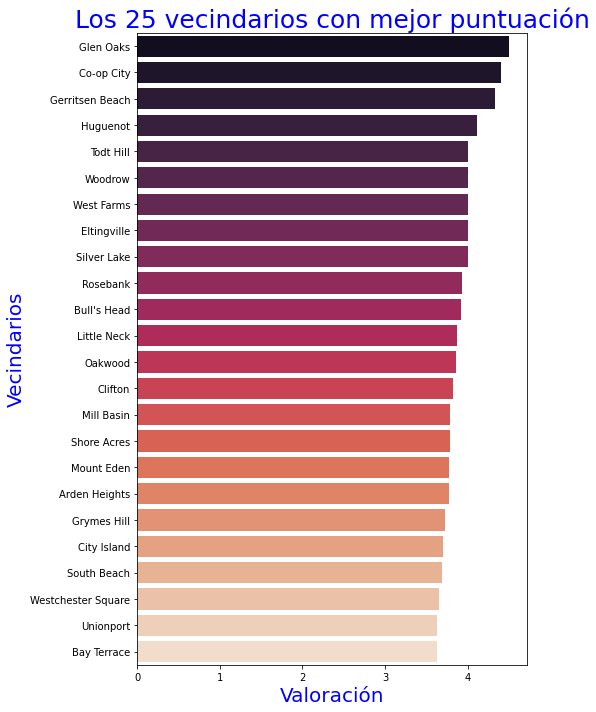

In [ ]:
plt.figure(figsize=(8,10))
plt.title('Los 25 vecindarios con mejor puntuación', loc='center', fontsize=25, color='b')
sns.barplot(x=avg_rating_per_neighbourhood.values, y=avg_rating_per_neighbourhood.index, palette='rocket')
plt.ylabel('Vecindarios', fontsize=20, color='b')
plt.xlabel('Valoración', fontsize=20, color='b')

plt.show()

# Grafico
• Columna Precio se define como string para eliminar $ y ,

• Cantidad de Valores nulos, y porcentaje del total

• Grafico para visualizar rango de precios - Histograma - y cantidad de oferta segun precio - BoxPlot -

In [ ]:
df_air['price'] = df_air['price'].str.replace("$","")
df_air['price'] = df_air['price'].str.replace(",","")
df_air['price'] = df_air['price'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df_air['price'] = df_air['price'].astype('float64', errors='ignore')

In [ ]:
print(df_air['price'].unique())

[ 966.  142.  620. ... 1184.  905.  309.]


In [ ]:
df_air['price'].isnull().sum()

247

In [ ]:
df_air['price'].isnull().sum()*100/len(df_air)


0.24074308716459225

<Figure size 1440x504 with 0 Axes>

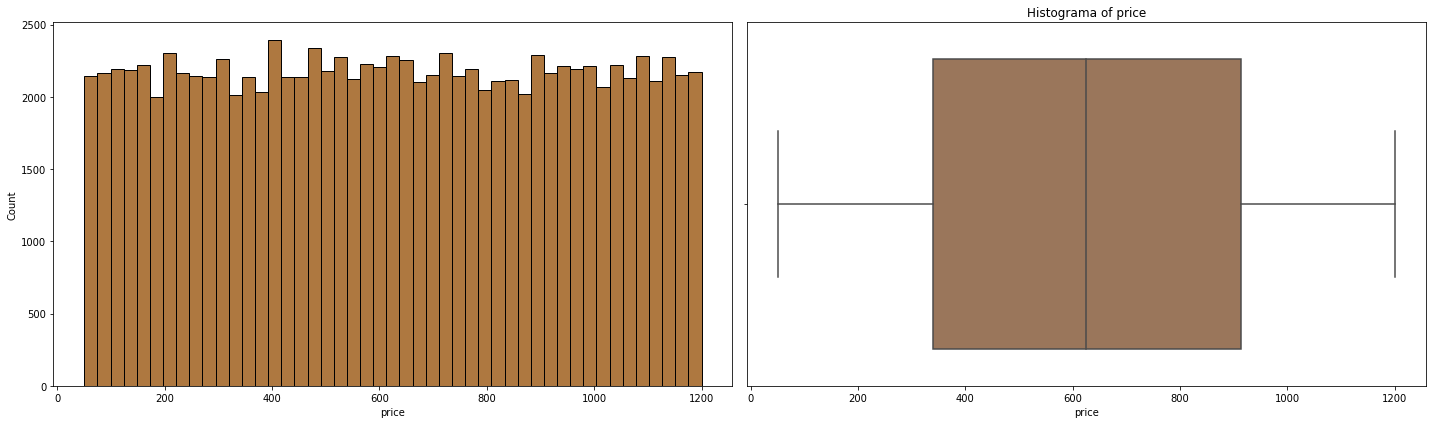

In [ ]:
plt.figure(figsize=(20,7))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.histplot(data=df_air, x='price', color='#934B00', ax=axes[0])
plt.title("Histograma of price")
sns.boxplot(data=df_air, x='price', whis=1.5, color='#A47551', ax=axes[1])
plt.show(abs)

# Plus Mathplotlib - Grafico de Torta


*   Distribución porcentual del tipo de Alojamiento disponible



In [ ]:
df_air['room_type'].nunique()

4

In [ ]:
print(df_air['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [ ]:
df_air['room_type'].value_counts()

Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: room_type, dtype: int64

In [ ]:
room_type_pct = df_air['room_type'].value_counts()*100/len(df_air)
print(room_type_pct)


Entire home/apt    52.340666
Private room       45.376661
Shared room         2.169612
Hotel room          0.113062
Name: room_type, dtype: float64


In [ ]:
plt.rcParams["figure.autolayout"] = True

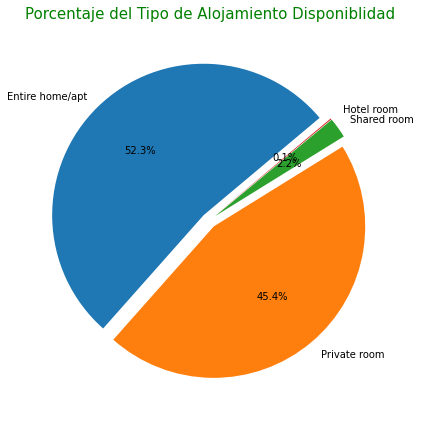

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(room_type_pct, labels = room_type_pct.index,autopct='%1.1f%%', startangle=40, explode=[0.05,0.05,0.05,0.05])
plt.title('Porcentaje del Tipo de Alojamiento Disponiblidad', loc='center', fontsize=15, color='g')
plt.axis("equal")

plt.show()

# Plus Seaborn - Diagrama de Dispersión


*   Distribución del precio de alojamiento por Barrio



Text(0.5, 0, 'Barrios')

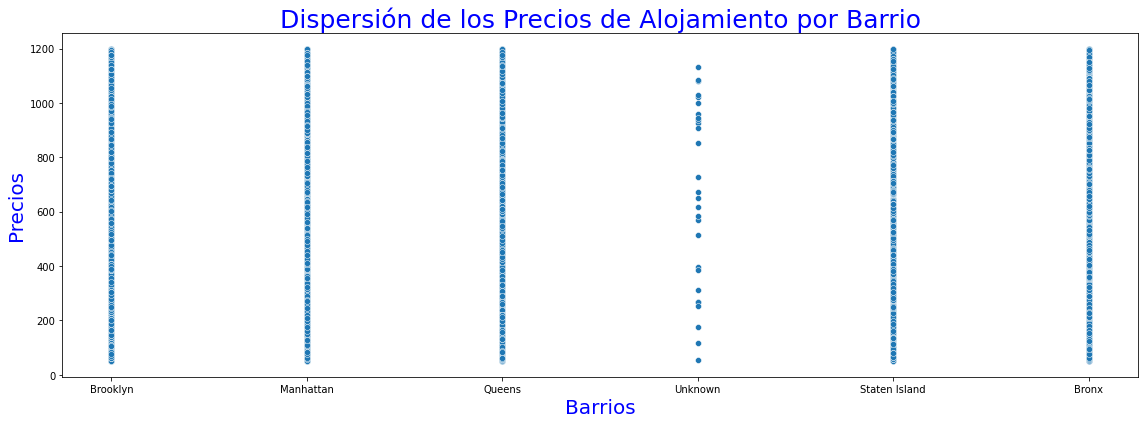

In [ ]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x= df_air['neighbourhood_group'], y="price", data=df_air)
plt.title('Dispersión de los Precios de Alojamiento por Barrio', loc='center', fontsize=25, color='b')
plt.ylabel('Precios', fontsize=20, color='b')
plt.xlabel('Barrios', fontsize=20, color='b')


# Plus Seaborn - Grafico de Barras

• Precios Promedios de Alquiler por suburvio.

In [ ]:
df_top_prices_by_neighbourhood = df_air.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()

In [ ]:
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

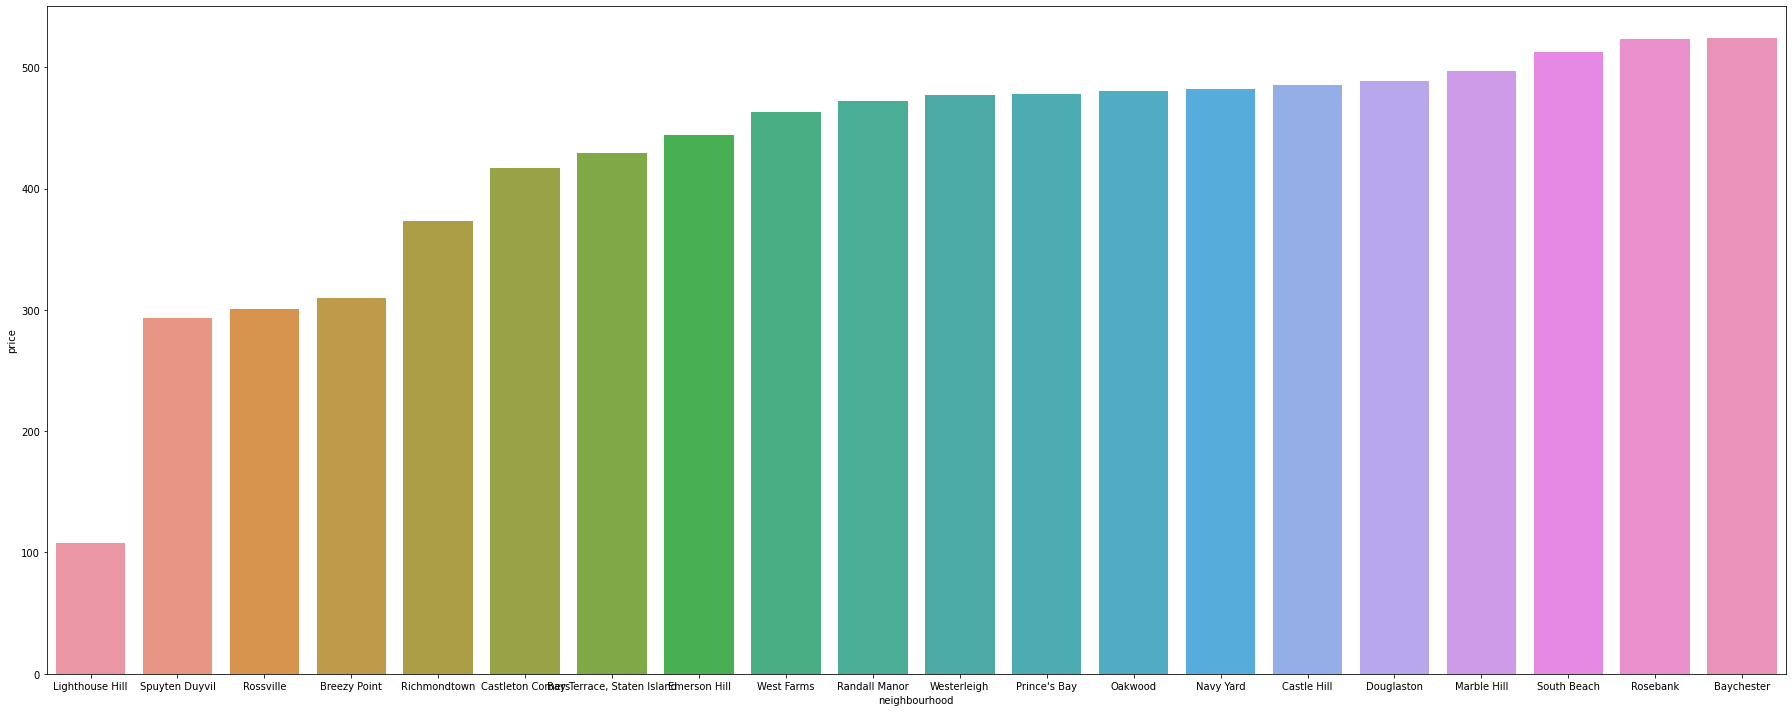

In [ ]:
plt.figure(figsize=(25, 10))
sns.barplot(x="neighbourhood", y="price", data=df_top_prices_by_neighbourhood.head(20))

# Nueva sección

In [ ]:
df_n_roomtype = df_air.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
df_n_roomtype

price
neighbourhood room_type                
Allerton      Entire home/apt   24207.0
              Private room      36882.0
Arden Heights Entire home/apt    6036.0
              Private room       1208.0
Arrochar      Entire home/apt   17643.0
...                                 ...
Woodlawn      Shared room        1404.0
Woodrow       Entire home/apt    2128.0
Woodside      Entire home/apt   91358.0
              Private room     277318.0
              Shared room        1289.0

[574 rows x 1 columns]

In [ ]:
df_n_roomtype = pd.pivot_table(df_n_roomtype, values='price', index=['neighbourhood'], columns=['room_type'])

In [ ]:
df_n_roomtype.sort_values('Private room', ascending = False).head(1)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bedford-Stuyvesant,2224398.0,NaN,2606447.0,103807.0


In [ ]:
df_n_roomtype.sort_values('Private room', ascending = True).head(1)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Richmondtown,1691.0,NaN,176.0,NaN


In [ ]:
df_n_roomtype.sort_values('Entire home/apt', ascending = False).head(1)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Williamsburg,2393814.0,1907.0,2415908.0,40032.0


In [ ]:
df_n_roomtype.sort_values('Entire home/apt', ascending = True).head(1)


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Little Neck,322.0,NaN,5132.0,1088.0


In [ ]:
df_n_roomtype.sort_values('Shared room', ascending = False).head(1)


room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Hell's Kitchen,1473929.0,10050.0,871972.0,104089.0


In [ ]:
df_n_roomtype.sort_values('Shared room', ascending = True).head(1)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Pelham Gardens,26895.0,NaN,18185.0,170.0


In [ ]:
df_neighbourhood_room_type_mean = df_air.groupby(['neighbourhood', 'room_type']) \
                                                .agg({'price': 'mean'}).reset_index()

In [ ]:
df_neighbourhood_room_type_mean = df_neighbourhood_room_type_mean.rename(columns = {'price': 'average_region_price'})


In [ ]:
df_neighbourhood_room_type_mean_pivot = pd.pivot_table(df_neighbourhood_room_type_mean, values='average_region_price', 
                           index=['neighbourhood'], columns=['room_type'])

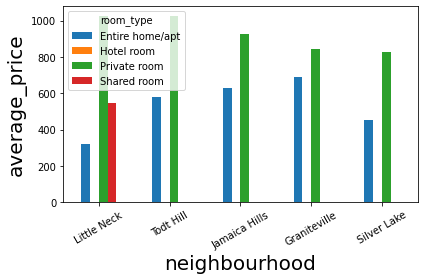

In [ ]:
ax=df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).head().plot(kind='bar', width = 0.5)
ax.set_xlabel('neighbourhood', fontsize = 20)
ax.set_ylabel('average_price', fontsize = 20)
labels=list(df_neighbourhood_room_type_mean_pivot.sort_values('Private room', ascending=False).index[:5])
ax.set_xticklabels(rotation=30,labels=labels,fontsize=10)
plt.show()